In [4]:
import pymysql
db = pymysql.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     passwd="root",       # your password
                     db="Project")

In [5]:
# querystr = 'SELECT distinct count(*) FROM ACCIDENT_DATA;'
querystr = "SELECT count(*) FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '';"
cur = db.cursor()
cur.execute(querystr)

1

In [6]:
for row in cur.fetchall():
    print("Total number of cases are:")
    print(row)

Total number of cases are:
(748583,)


In [64]:
for row in cur.fetchall():
    print("Total number of cases are:")
    print(row)

Total number of cases are:
(317869,)


In [20]:
# querystr = "SELECT COUNT(CustomerID), Country FROM ACCIDENT_DATA GROUP BY Country;"
querystr = "SELECT BOROUGH,count(BOROUGH) FROM ACCIDENT_DATA WHERE BOROUGH IS NOT NULL and BOROUGH <> '' group by BOROUGH "
cur = db.cursor()
cur.execute(querystr)

5

In [21]:
borough = []
count = []
for row in cur.fetchall():
    borough.append(row[0])
    count.append(row[1])
#     print(row)

['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'] [42953, 98536, 79282, 84034, 13064]


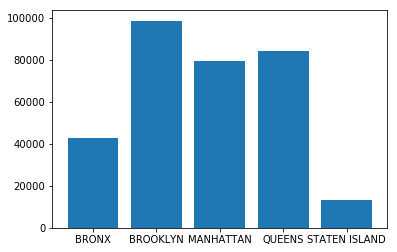

In [22]:
print(borough, count)
import matplotlib.pyplot as plt
%matplotlib inline

a = [1,2,3,4,5]
# b = df.value_counts()
plt.bar(a, count, align='center')
plt.xticks(a, borough)
plt.show()

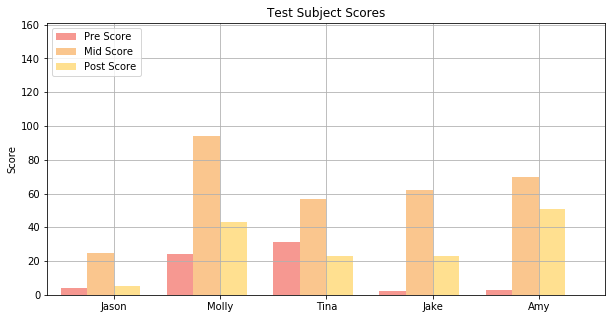

In [30]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'pre_score': [4, 24, 31, 2, 3],
        'mid_score': [25, 94, 57, 62, 70],
        'post_score': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'pre_score', 'mid_score', 'post_score'])

# Setting the positions and width for the bars
pos = list(range(len(df['pre_score']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df['pre_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['first_name'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['mid_score'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df['first_name'][1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df['post_score'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in first_name
        label=df['first_name'][2]) 

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['first_name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['Pre Score', 'Mid Score', 'Post Score'], loc='upper left')
plt.grid()
plt.show()

In [31]:
# plot factors vs borough
import matplotlib.pyplot as plt
%matplotlib inline
querystr = 'select count(*) as count, CONTRIBUTING_FACTOR_VEHICLE_1 from ACCIDENT_DATA where CONTRIBUTING_FACTOR_VEHICLE_1 <> "" AND CONTRIBUTING_FACTOR_VEHICLE_1 <> "Unspecified" group by CONTRIBUTING_FACTOR_VEHICLE_1 order by count DESC LIMIT 3;'
cur = db.cursor()
cur.execute(querystr)
a = []
b = []
for row in cur.fetchall():
    a.append(row[0])
    b.append(row[1])
print(a,b)
# a = [1,2,3,4,5]

pos = 




[62064, 20796, 19483] ['Driver Inattention/Distraction', 'Fatigued/Drowsy', 'Failure to Yield Right-of-Way']


/home/karan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/karan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/karan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


plotting Great Circle from New York to London (Mercator)
plotting Great Circle from New York to London (Gnomonic)


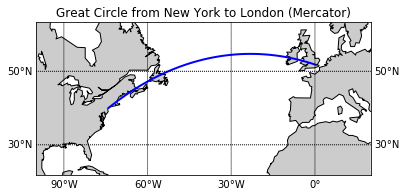

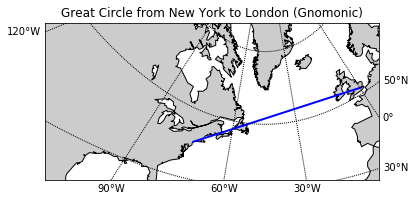

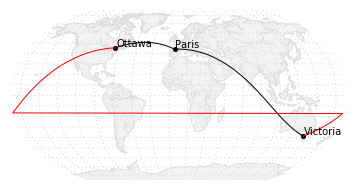

In [1]:
# example demonstrating how to draw a great circle on a map.
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import sys

# setup lambert azimuthal map projection.
# create new figure
fig=plt.figure()
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='c',area_thresh=10000.,projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
# nylat, nylon are lat/lon of New York
nylat = 40.78
nylon = -73.98
# lonlat, lonlon are lat/lon of London.
lonlat = 51.53
lonlon = 0.08

# find 1000 points along the great circle.
#x,y = m.gcpoints(nylon,nylat,lonlon,lonlat,1000)
# draw the great circle.
#m.plot(x,y,linewidth=2)
# drawgreatcircle performs the previous 2 steps in one call.
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')

m.drawcoastlines()
m.fillcontinents()
# draw parallels
circles = np.arange(10,90,20)
m.drawparallels(circles,labels=[1,1,0,1])
# draw meridians
meridians = np.arange(-180,180,30)
m.drawmeridians(meridians,labels=[1,1,0,1])
plt.title('Great Circle from New York to London (Mercator)')
sys.stdout.write('plotting Great Circle from New York to London (Mercator)\n')

# create new figure
fig=plt.figure()
# setup a gnomonic projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            resolution='c',area_thresh=10000.,projection='gnom',\
            lat_0=40.,lon_0=-45.)
# nylat, nylon are lat/lon of New York
nylat = 40.78
nylon = -73.98
# lonlat, lonlon are lat/lon of London.
lonlat = 51.53
lonlon = 0.08

# find 1000 points along the great circle.
#x,y = m.gcpoints(nylon,nylat,lonlon,lonlat,1000)
# draw the great circle.
#m.plot(x,y,linewidth=2)
# drawgreatcircle performs the previous 2 steps in one call.
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents()
# draw parallels
circles = np.arange(10,90,20)
m.drawparallels(circles,labels=[0,1,0,0])
# draw meridians
meridians = np.arange(-180,180,30)
m.drawmeridians(meridians,labels=[1,1,0,1])
plt.title('Great Circle from New York to London (Gnomonic)')
sys.stdout.write('plotting Great Circle from New York to London (Gnomonic)\n')

fig=plt.figure()


# Example of Great Circles which exit and reenter the map
m = Basemap(projection='robin', lat_0=0, lon_0=0,resolution='c')

m.drawmapboundary(fill_color='#ffffff',color='#ffffff')
m.fillcontinents(color='#f2f2f2',lake_color='#ffffff')
m.drawcoastlines(color='#e0e0e0')
m.drawcountries(color='#e0e0e0')

parallels = np.arange(-90,90,10.)
meridians = np.arange(10.,351.,20.)
m.drawparallels(parallels,labels=[False,False,False,False], color='#d3d3d3',dashes=[1,3])
m.drawmeridians(meridians,labels=[False,False,False,False], color='#d3d3d3',dashes=[1,3])

# Choose the lat and longtitude of two points

p1 = (45.27,-75.42) # roughly Ottawa
p2 = (44.05,-4.28)  # roughly Paris
p3 = (-38.58,145.05) # roughly Victoria

la1, lo1 = p1
la2, lo2 = p2
la3, lo3 = p3

# Drawing points; you need to convert from lon-lat to xy-cartesian
x1,y1 = m(lo1,la1)
x2,y2 = m(lo2,la2)
x3,y3 = m(lo3,la3)

# Convert back by setting inverse=True
lon,lat = m(x1,y1,inverse=True)

# Plot pionts using markers
m.plot(x1,y1, marker='.', markersize=8, color='#000000')  
m.plot(x2,y2, marker='.', markersize=8, color='#000000')  
m.plot(x3,y3, marker='.', markersize=8, color='#000000')  

# Of note, the map uses metres as it's smallest distance, so 1000*x is x km
# The offset is in projection cooordinates
plt.text(x1+100000,y1+100000,'Ottawa')
plt.text(x2+100000,y2+100000,'Paris')
plt.text(x3+100000,y3+100000,'Victoria')

# Draw a great circle line joining them
m.drawgreatcircle(lo1,la1,lo2,la2,linewidth=1,color='#000000',alpha=1,del_s=100)
m.drawgreatcircle(lo2,la2,lo3,la3,linewidth=1,color='#000000',alpha=1,del_s=100)

# Drawing a great circle which exits and reenters the map works on certain projections
m.drawgreatcircle(lo1,la1,lo3,la3,linewidth=1,color='#FF0000',alpha=1,del_s=100)

plt.show()

In [3]:
from bigquery import get_client

ModuleNotFoundError: No module named 'bigquery'

In [1]:
# Imports the Google Cloud client library
from google.cloud import bigquery

# Instantiates a client
bigquery_client = bigquery.Client()

# The name for the new dataset
dataset_id = 'my_new_dataset'

# Prepares a reference to the new dataset
dataset_ref = bigquery_client.dataset(dataset_id)
dataset = bigquery.Dataset(dataset_ref)

# Creates the new dataset
dataset = bigquery_client.create_dataset(dataset)

print('Dataset {} created.'.format(dataset.dataset_id))

DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or
explicitly create credential and re-run the application. For more
information, please see
https://developers.google.com/accounts/docs/application-default-credentials.